In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/Iris.csv")

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Drop the 'Id' column
df.drop("Id", axis=1, inplace=True)

# Separate features and labels
X = df.drop("Species", axis=1)
y = df["Species"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
k_values = [1, 3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"\nK = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



K = 1
Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

K = 3
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 5
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 7
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


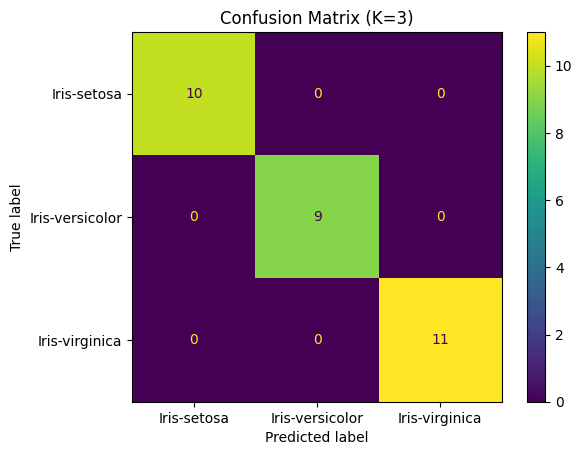

In [8]:
best_k = 3  # You can choose the best based on accuracy above
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()


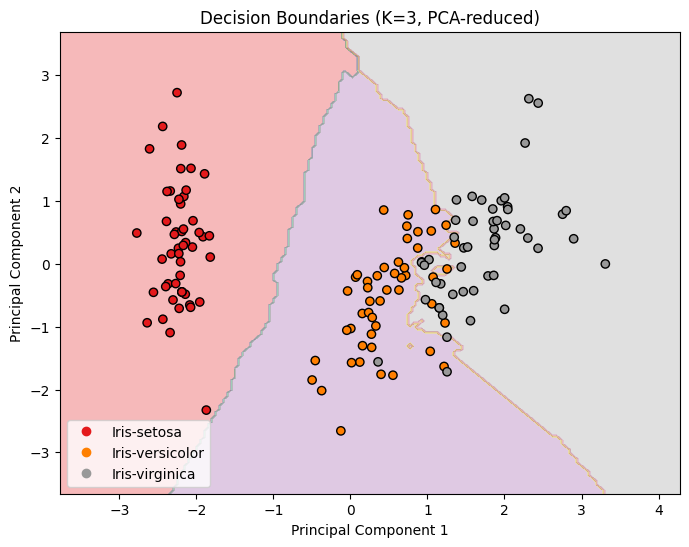

In [11]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled from earlier normalization step

# Step 2: Fit KNN classifier on PCA-reduced data
best_k = 3  # or your selected best value
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_pca, y)

# Step 3: Create meshgrid to plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Step 4: Predict labels for each point in meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numeric, _ = pd.factorize(Z)  # convert string labels to integers
Z_numeric = Z_numeric.reshape(xx.shape)

# Step 5: Plot decision boundaries and points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='Set1')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], cmap='Set1', edgecolor='k')

# Fix legend issue
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(knn_2d.classes_))

# Labels and title
plt.title(f"Decision Boundaries (K={best_k}, PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
